<a href="https://colab.research.google.com/github/AbhinavCurseOK/DNN_ANN/blob/main/DNN_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:00<00:00, 140MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
train_dir = os.path.join(path, 'fashion-mnist_train.csv')
test_dir = os.path.join(path, 'fashion-mnist_test.csv')

In [3]:
import pandas as pd

In [4]:
def load_images_from_df(df):
    images = df.iloc[:, 1:].values.astype('float32')
    images = images.reshape(-1, 28, 28, 1)
    images /= 255.0
    return images
def load_labels_from_df(df):
    labels = df.iloc[:, 0].values.astype('int32')
    return labels
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

In [5]:
train_images = load_images_from_df(train_df)
train_labels = load_labels_from_df(train_df)
test_images = load_images_from_df(test_df)
test_labels = load_labels_from_df(test_df)

In [6]:
train_labels = train_df.iloc[:, 0].values
test_labels = test_df.iloc[:, 0].values

In [7]:
import numpy as np
unique_train_labels, counts_train_labels = np.unique(train_labels, return_counts=True)
unique_test_labels, counts_test_labels = np.unique(test_labels, return_counts=True)
print("Unique training labels:", unique_train_labels)
print("Counts of training labels:", counts_train_labels)
print("Unique testing labels:", unique_test_labels)
print("Counts of testing labels:", counts_test_labels)

Unique training labels: [0 1 2 3 4 5 6 7 8 9]
Counts of training labels: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Unique testing labels: [0 1 2 3 4 5 6 7 8 9]
Counts of testing labels: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [8]:
class_names = {
       0: 'T-shirt/top',
       1: 'Trouser',
       2: 'Pullover',
       3: 'Dress',
       4: 'Coat',
       5: 'Sandal',
       6: 'Shirt',
       7: 'Sneaker',
       8: 'Bag',
       9: 'Ankle boot'
   }
label_value = 5
class_name = class_names[label_value]
print(f"Label value {label_value} corresponds to class: {class_name}")

Label value 5 corresponds to class: Sandal


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [10]:
#model architecture
model = keras.Sequential(name='my_cnn_model')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv_layer_1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_layer_2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling_2'))
model.add(layers.Flatten(name='flatten_layer'))
model.add(layers.Dense(128, activation='relu', name='dense_layer_1'))
model.add(layers.Dense(10, activation='softmax', name='output_layer'))
#model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#model architecture
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train Model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7780 - loss: 0.6073
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8829 - loss: 0.3157
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9033 - loss: 0.2617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9141 - loss: 0.2281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.1970
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9349 - loss: 0.1730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9412 - loss: 0.1554
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9488 - loss: 0.1343
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9574 - loss: 0.1158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9632 - loss: 0.0995


In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.9224 - loss: 0.2572

Test accuracy: 0.9223999977111816


In [ ]:
#model

In [15]:
# Train Model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.0889
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9710 - loss: 0.0782
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9761 - loss: 0.0657
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9767 - loss: 0.0604
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9800 - loss: 0.0527
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0472
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9849 - loss: 0.0415
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9868 - loss: 0.0362
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0341
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9871 - loss: 0.0338
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9893 - loss: 0.0279
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

In [17]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,  ##20 not gave 82% training accuracy##test 86% accuracy
    width_shift_range=0.15,#0.2
    height_shift_range=0.15,#0.2
    shear_range=0.15,#0.2
    zoom_range=0.15,#0.2
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_datagen.fit(train_images)

In [18]:
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow(
    x=test_images,
    y=test_labels,
    batch_size=32,
    shuffle=False
)

In [19]:
print(train_labels)

[2 9 6 ... 8 8 7]


In [20]:
print(test_labels)

[0 1 2 ... 8 8 1]


In [21]:
model_1 = keras.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
#model_1.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
#model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(32, activation='relu'))
#model_1.add(layers.Dense(10, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

In [22]:
optimizer = Adam(learning_rate=0.0005)
model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 920,682 (3.51 MB)

 Trainable params: 920,682 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_1.fit(train_generator,epochs=30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.5568 - loss: 1.1926
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.7329 - loss: 0.7029
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7735 - loss: 0.5985
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7936 - loss: 0.5569
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8122 - loss: 0.5026
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8249 - loss: 0.4750
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8362 - loss: 0.4471
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8371 - loss: 0.4349
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8423 - loss: 0.4251
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8491 - loss: 0.4094
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8555 - loss: 0.3948
Epoch 12/30
1875/18

In [25]:
# Evaluate the model
test_loss, test_acc = model_1.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9105 - loss: 0.2507
Test accuracy: 0.911300003528595


In [26]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_datagen.fit(train_images)

In [27]:
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow(
    x=test_images,
    y=test_labels,
    batch_size=32,
    shuffle=False
)

In [28]:
model_1 = keras.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_1.fit(train_generator,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.6539 - loss: 0.9391
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7829 - loss: 0.5703
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8154 - loss: 0.4900
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8311 - loss: 0.4530
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8384 - loss: 0.4283
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8488 - loss: 0.4088
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8532 - loss: 0.3988
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8552 - loss: 0.3864
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8601 - loss: 0.3788
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8620 - loss: 0.3751
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8641 - loss: 0.3670
Epoch 12

In [32]:
# Evaluate the model
test_loss, test_acc = model_1.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9073 - loss: 0.2518
Test accuracy: 0.9115999937057495


In [33]:
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow(
    x=test_images,
    y=test_labels,
    batch_size=32,
    shuffle=False
)

In [34]:
model_2 = keras.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(10, activation='softmax'))

In [36]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
optimizer = Adam(learning_rate=0.0008)
model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model_2.fit(train_generator,epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.6663 - loss: 0.9005
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7908 - loss: 0.5386
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8243 - loss: 0.4637
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8428 - loss: 0.4206
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8452 - loss: 0.4095
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8551 - loss: 0.3905
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8614 - loss: 0.3742
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8675 - loss: 0.3611
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8694 - loss: 0.3469
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8710 - loss: 0.3485
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8713 - loss: 0.3370
Epoch 12

In [39]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.2462
Test accuracy: 0.9139999747276306


In [40]:
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,#16 -->87% ttain accuracy#10:epoch#lr=0.0008
    shuffle=True
)

test_generator = test_datagen.flow(
    x=test_images,
    y=test_labels,
    batch_size=32,
    shuffle=False
)

In [41]:
#model_1 = keras.Sequential()
#model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model_1.add(layers.MaxPooling2D((2, 2)))
#model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_1.add(layers.MaxPooling2D((2, 2)))
#model_1.add(layers.Flatten())
#model_1.add(layers.Dense(256, activation='relu'))#128#256
#model_1.add(layers.Dense(512, activation='relu'))#256#128
#model_1.add(layers.Dropout(0.5)) #0.7 not gave good result on 64 and 32 batch,,lr was 0.0008
#model_1.add(layers.Dense(10, activation='softmax'))
#optimizer = Adam(learning_rate=0.0006)
#model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_3 = keras.Sequential(name='my_model')
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv_layer_1'))
model_3.add(layers.MaxPooling2D((2, 2), name='max_pooling_1'))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_layer_2'))
model_3.add(layers.MaxPooling2D((2, 2), name='max_pooling_2'))
model_3.add(layers.Flatten(name='flatten_layer'))
model_3.add(layers.Dense(256, activation='relu', name='dense_layer_1'))
model_3.add(layers.Dense(512, activation='relu', name='dense_layer_2'))
model_3.add(layers.Dropout(0.5, name='dropout_layer'))
model_3.add(layers.Dense(10, activation='softmax', name='output_layer'))
optimizer = Adam(learning_rate=0.0006)
model_3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model_3.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_1 (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_2 (MaxPooling2D)         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_1 (Dense)                │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer (Dropout)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 565,386 (2.16 MB)

 Trainable params: 565,386 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_3.fit(train_generator,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6530 - loss: 0.9212
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7951 - loss: 0.5358
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8269 - loss: 0.4518
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8438 - loss: 0.4160
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8587 - loss: 0.3793
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8611 - loss: 0.3682
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8706 - loss: 0.3472
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8732 - loss: 0.3406
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8774 - loss: 0.3276
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8801 - loss: 0.3249
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8824 - loss: 0.3156
Epoch 12

In [45]:
# Evaluate the model
test_loss, test_acc = model_3.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9215 - loss: 0.2252
Test accuracy: 0.9229000210762024


In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def visualize_feature_maps(model, layer_names, input_image):
  """Visualizes feature maps from specified layers of a CNN.

  Args:
    model: The Keras CNN model.
    layer_names: A list of layer names to visualize.
    input_image: The input image to the model.
  """
  input_shape = input_image.shape
  outputs = [model_3.get_layer(layer_name).output for layer_name in layer_names]
  activation_model = tf.keras.Model(inputs=model_3.layers[0].input, outputs=outputs)
  activations = activation_model.predict(input_image)

  for layer_name, activation in zip(layer_names, activations):
    num_filters = activation.shape[-1]
    plt.figure(figsize=(10, 10))
    for i in range(num_filters):
      plt.subplot(8, 8, i + 1)
      plt.imshow(activation[0, :, :, i], cmap='viridis')
      plt.title(f"{layer_name}, Filter {i + 1}")
      plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


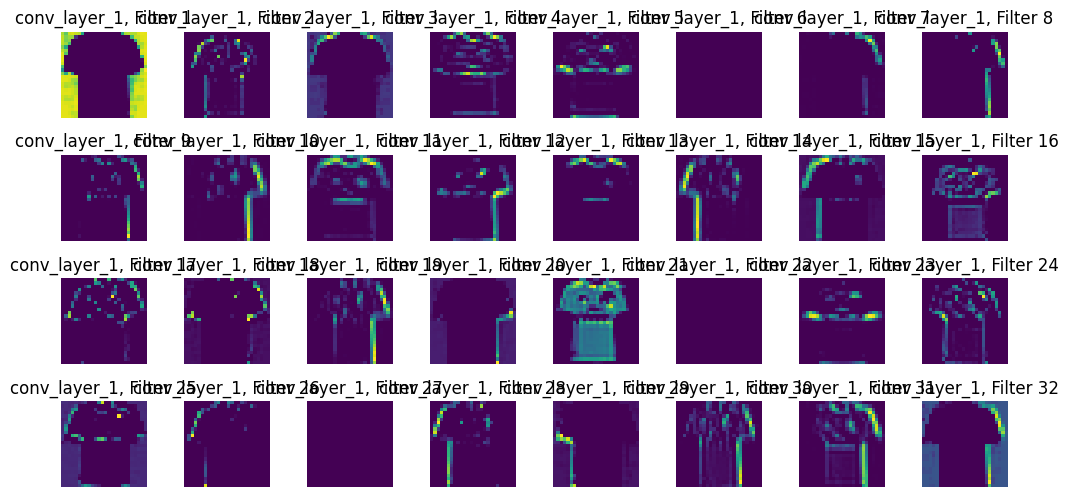

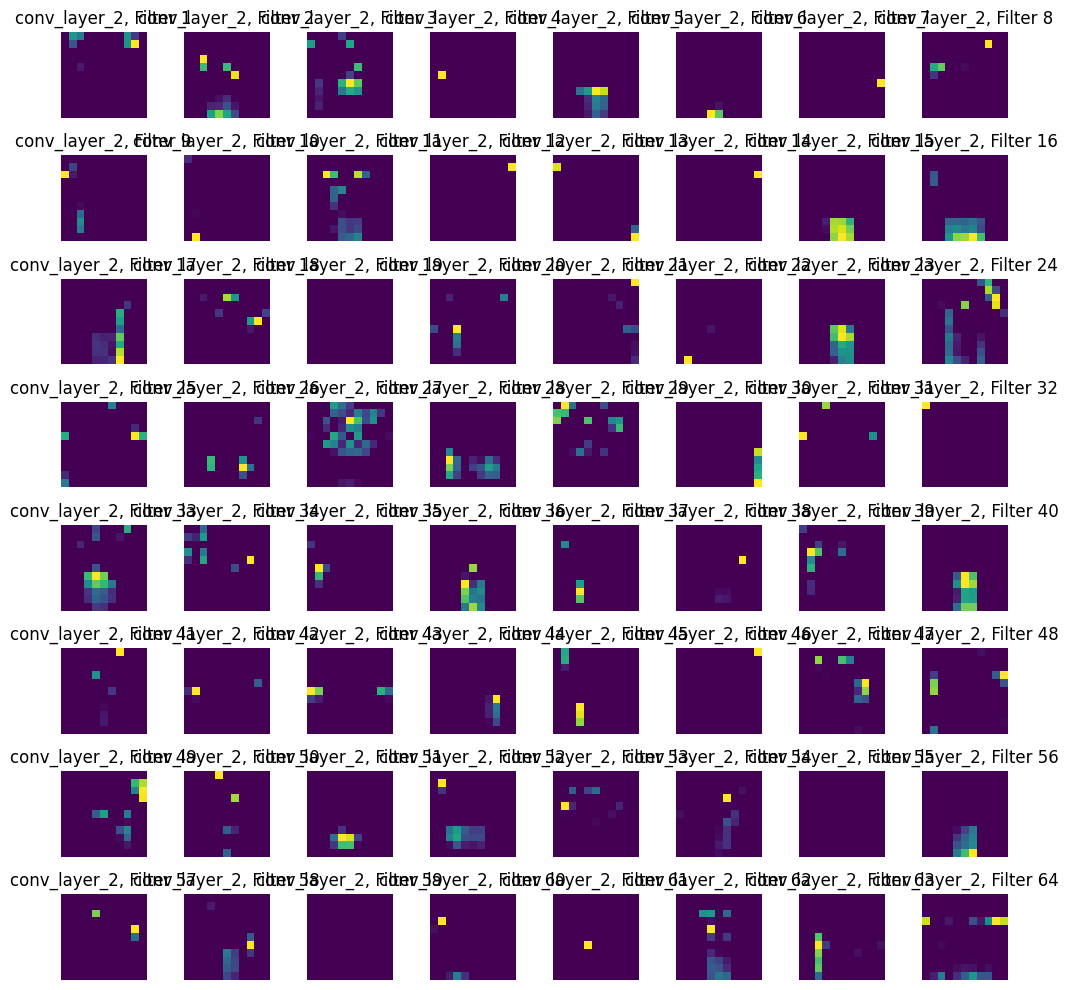

In [72]:
input_image = test_images[0:1]
layer_names = ['conv_layer_1', 'conv_layer_2']
visualize_feature_maps(model_3, layer_names, input_image)